## **Exercise (Part 1): Rebuild the Complex Quantum Circuit using Qiskit**

You are given a quantum circuit diagram (as seen in the image). Your task is to reconstruct this circuit using Qiskit, ensuring that the qubit assignments, gate operations, and measurements match exactly.

**Circuit Diagram Description:**

- **Number of qubits:** 6
- **Gates and operations involved:**
  - **Initialize states:** Some qubits are initialized into custom states.
  - **Hadamard gates (H)**
  - **Rotation gates (Rx, Ry, Rz)**
  - **CNOT (Controlled-X) gates**
  - **Multi-Controlled NOT (Toffoli) gates**
  - **Controlled RZ gates**
  - **Universal gate (U)**
  - **Controlled Universal gate (CU)**
  - **Swap gates**
  - **Barrier**
  - **Measurement**

**Circuit Details:**

1. **Qubit 0:**
    - **Initialize** in the state |+⟩ (state vector \[0.707, 0.707\]).
    - Apply a **Hadamard (H)** gate.
2. **Qubit 1:**
    - **Initialize** in the state |0⟩ (state vector \[1, 0\]).
    - Apply a **Hadamard (H)** gate.
3. **Qubit 2:**
    - Apply an **Ry gate** with an angle of π/3.
    - Apply a **CNOT gate** with control on qubit 1 and target on qubit 2.
    - Apply a **Swap gate** between qubits 2 and 3.
    - Apply a **Hadamard (H)** gate.
    - Apply an **Rz gate** with an angle of π/2.
4. **Qubits 1, 2, and 3:**
    - Apply a **Toffoli gate (Multi-controlled NOT)** with controls on qubits 1 and 2, and target on qubit 3.
5. **Barrier:**
    - Add a **barrier** after the Toffoli gate, separating the sections of the circuit.
6. **Qubit 4:**
    - Apply a **U3 gate** with parameters (θ = π/3, φ = π/4, λ = π/2).
7. **Qubits 3 and 4:**
    - Apply a **Controlled-U gate** with the U3 parameters (θ = π/3, φ = π/4, λ = π/2, and γ = 0), controlled by qubit 3.
8. **Qubits 4 and 5:**
    - Apply a **Swap gate** between qubits 4 and 5.
9. **Measurements:**
    - Measure all qubits (q0 to q5).

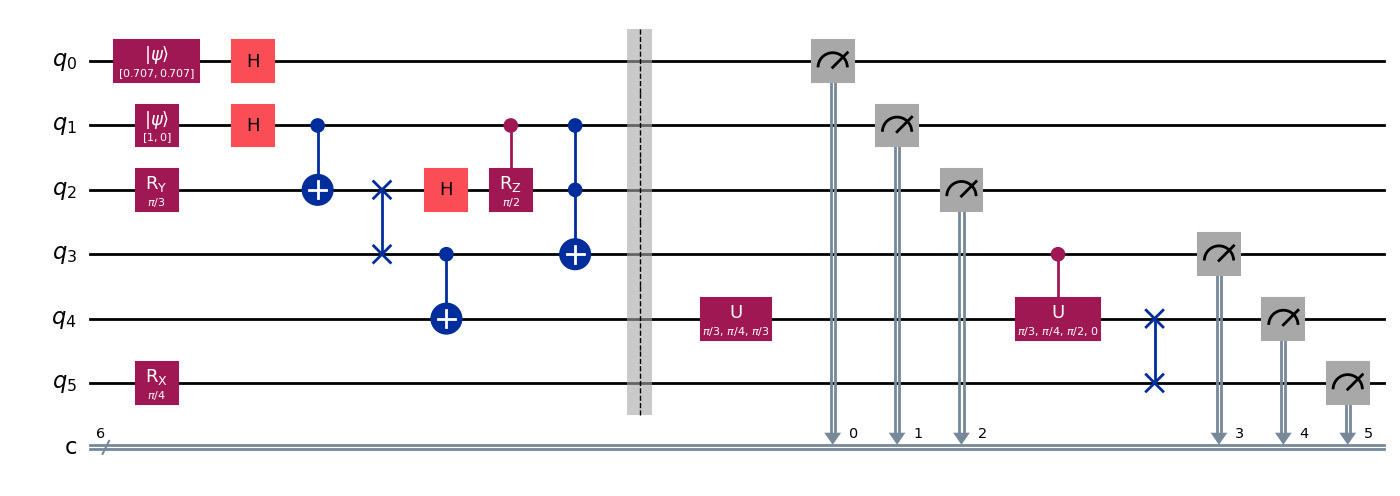

In [143]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
 
import numpy as np

# Create a quantum circuit with CNOT
qc = QuantumCircuit(6,6)
qc.initialize([1/2**0.5, 1/2**0.5], 0)
qc.initialize([1**0.5, 0], 1)

qc.h(0)
qc.h(1)
qc.ry(np.pi/3, 2)
qc.cx(1,2)
qc.swap(2,3)
qc.h(2)
qc.cx(3,4)

qc.crz(np.pi/2,1,2)
qc.ccx(1,2,3)

qc.rx(np.pi/4,5)
qc.barrier()
qc.u(np.pi/3, np.pi/4, np.pi/3,4)
qc.measure([0, 1, 2], [0,1,2])
qc.cu(np.pi/3,np.pi/4,np.pi/2,0,3,4)
qc.swap(4,5)
qc.measure([3, 4, 5], [3,4,5])
qc.draw("mpl", style="iqp")




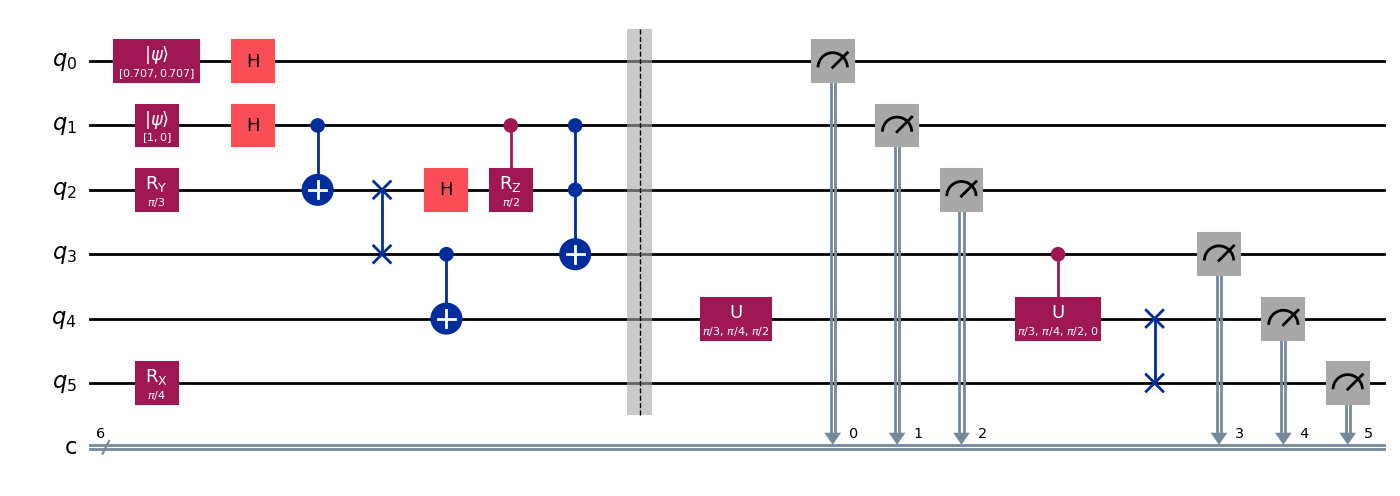

## **Exercise (Part 2): Adding and Decomposing the DCX and ISWAP Gates**

### **Objective:**
In this part, you will create a new 2-qubit quantum circuit using **two gates** that we haven't covered yet: `dcx` and `iswap`. You'll then **decompose** these gates to see what basic operations they consist of, as illustrated in the image, and finally **integrate** this new 2-qubit circuit into the circuit from Part 1.

### **New Gates:**
- **DCX (Double-CNOT or Double-Controlled-X):**
  - The `dcx` gate is a symmetric operation that swaps the qubit states using two **CNOT** gates.
- **ISWAP (Interaction-Swap):**
  - The `iswap` gate is a swap gate with an additional **phase shift**. It swaps the states of the two qubits and adds a phase of \(i\).

### **Instructions:**

1. **Create the 2-Qubit Circuit:**
    - Start by creating a new 2-qubit circuit with qubits labeled `q0` and `q1`.
    - Apply the **DCX** gate to the two qubits.
    - Apply the **ISWAP** gate after the DCX gate.
  
2. **Decomposition of the Gates:**
    - **Decompose** the DCX and ISWAP gates into their constituent basic gates (as shown in the image).
    - After applying the DCX and ISWAP gates, add a decomposition of the gates to reveal their structure.
  
3. **Integrate with Previous Circuit:**
    - Attach this new 2-qubit circuit to the **6-qubit circuit** from Part 1. The two qubits of the new circuit should correspond to **qubits 0 and 1** in the previous circuit.
  
4. **Combine Everything:**
    - Combine the new 2-qubit circuit with the **final circuit** from Part 1.
    - Ensure that all qubits are measured.

### **Hints:**

- You can add the **DCX** gate using `.dcx(1st_qubit, 2nd_qubit)` in Qiskit.

- Similarly, you can add the **ISWAP** gate using `.iswap(1st_qubit, 2nd_qubit)` in Qiskit.

- To **decompose** these gates and reveal the internal structure, you can use the `.decompose()` method.

- To **attach** the new 2-qubit circuit to the existing 6-qubit circuit from Part 1, use the `.compose()` function in Qiskit. You can specify which qubits of the smaller circuit to attach the larger circuit to:
  ```python
  qc_combined = qc1.compose(qc2, qubits=[0, 1])
  ```

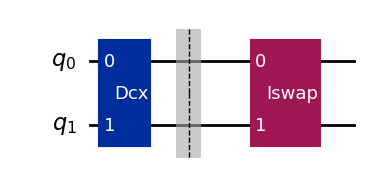

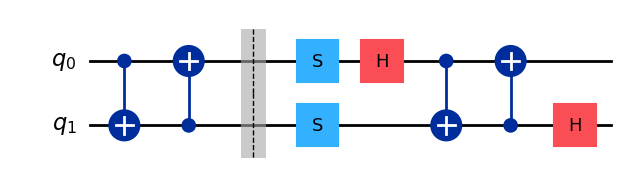

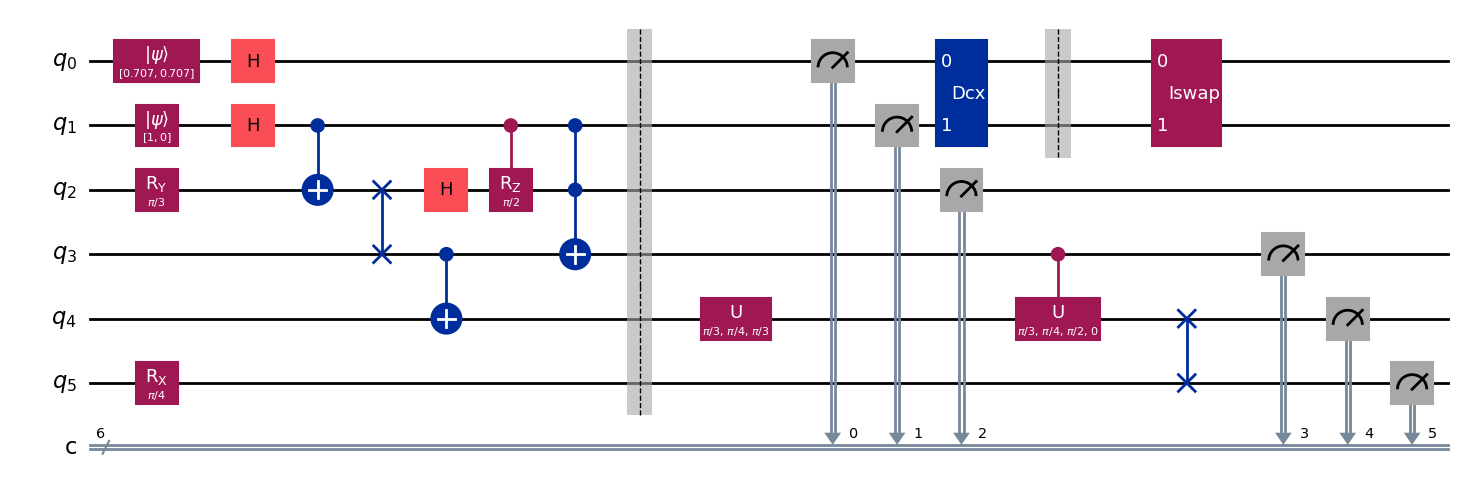

In [144]:
# Create a quantum circuit
qc2 = QuantumCircuit(2)

qc2.dcx(0,1) 
qc2.barrier()
qc2.iswap(0,1)

display(qc2.draw("mpl", style="iqp"))


from qiskit.circuit.library import iSwapGate
from qiskit.circuit.library import DCXGate


qc3 = QuantumCircuit(2)
qc3.append(DCXGate(),[0,1])
qc3.barrier()
qc3.append(iSwapGate(), [0, 1])


qc3 = qc3.decompose()
# Now decompose it and display

display(qc3.draw("mpl", style="iqp"))


qc.append(DCXGate(),[0,1])
qc.barrier([0,1])
qc.append(iSwapGate(), [0, 1])

display(qc.draw("mpl", style="iqp"))




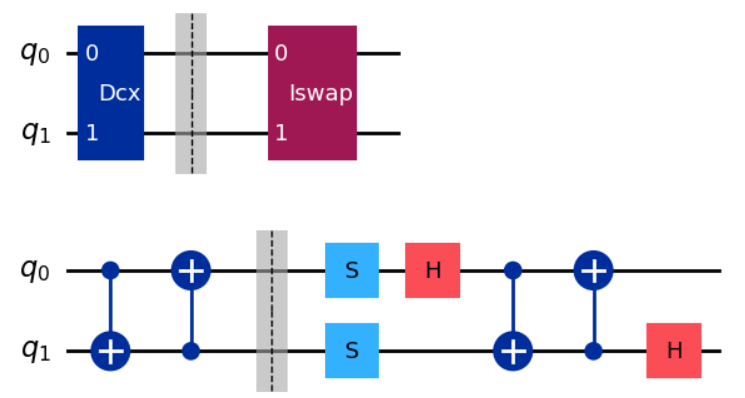

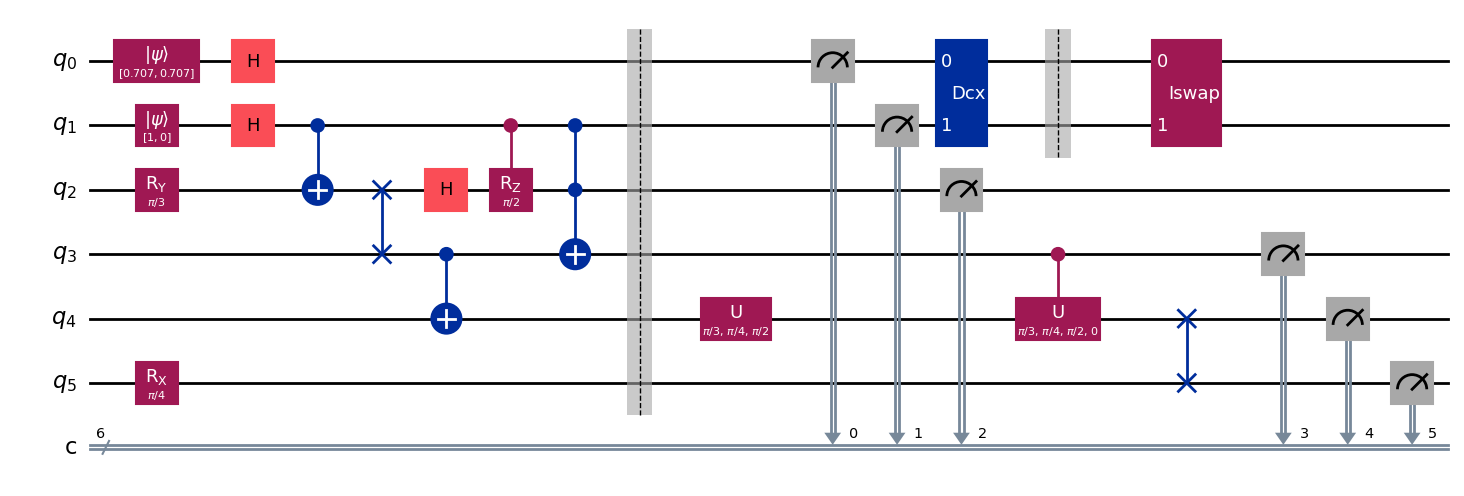

### **Exercise  (Part 3): Building and Appending a Parametric 2-Qubit Circuit**

### **Objective:**
Create a 2-qubit **parametric quantum circuit** that uses rotation gates \(R_x\), \(R_y\), and \(R_z\) with parameters. Convert this parametric circuit into a custom **gate** and append it to the **2-qubit circuit** from Part 2, attaching the gate to **qubits 0 and 2** of the combined circuit.

### **Parametric Circuit Design:**

Design a 2-qubit parametric circuit using rotation gates:

1. **Qubit 0:**
   - Apply a **\(R_x(θ)\)** gate (rotation around the x-axis).
   - Apply a **CNOT gate** with **control** on qubit 0 and **target** on qubit 1.

2. **Qubit 1:**
   - Apply an **\(R_y(φ)\)** gate (rotation around the y-axis).
   - Apply an **\(R_z(λ)\)** gate (rotation around the z-axis).

### **Instructions:**

1. **Create the Parametric Circuit:**
    - Define a new 2-qubit parametric circuit with **parameters** \( θ \), \( φ \), and \( λ \).
    - Apply the gates as described above to **qubits 0 and 1** of the parametric circuit.

2. **Convert to a Custom Gate:**
    - Convert the parametric circuit into a **custom gate** using Qiskit’s `to_gate()` method.

3. **Append to the Circuit from Part 2:**
    - Append this **custom gate** to the circuit from Part 2.
    - Apply the custom gate to **qubits 0 and 2** of the circuit from Part 2.

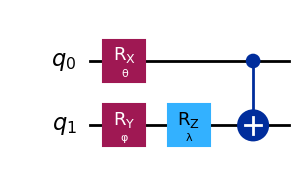

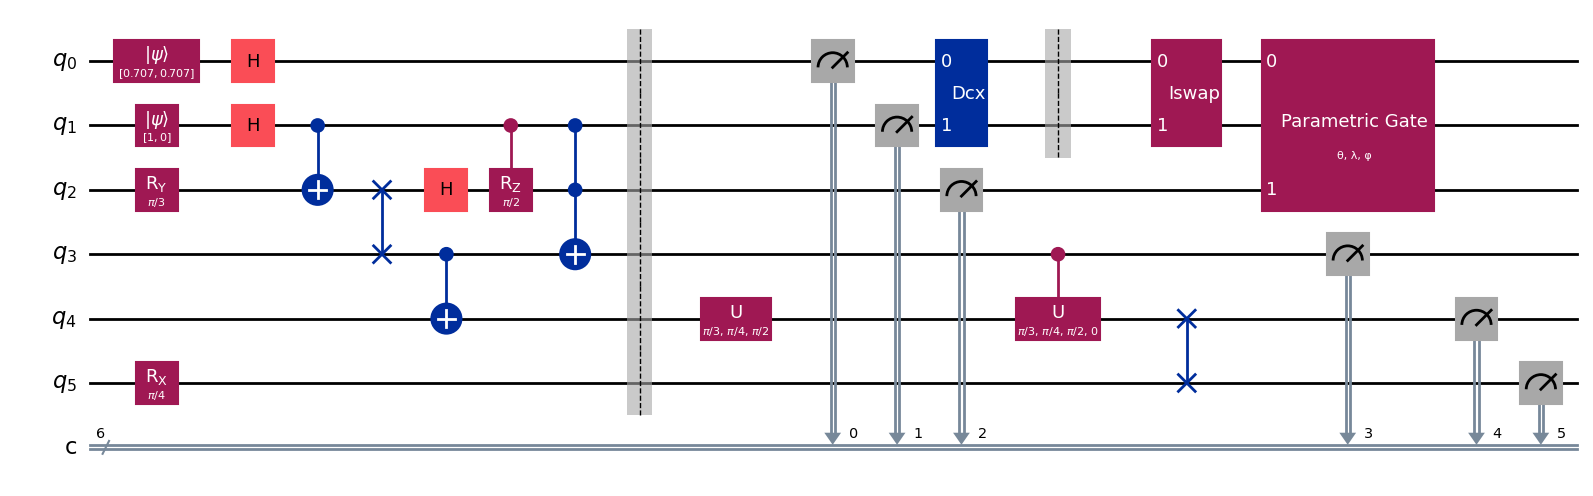

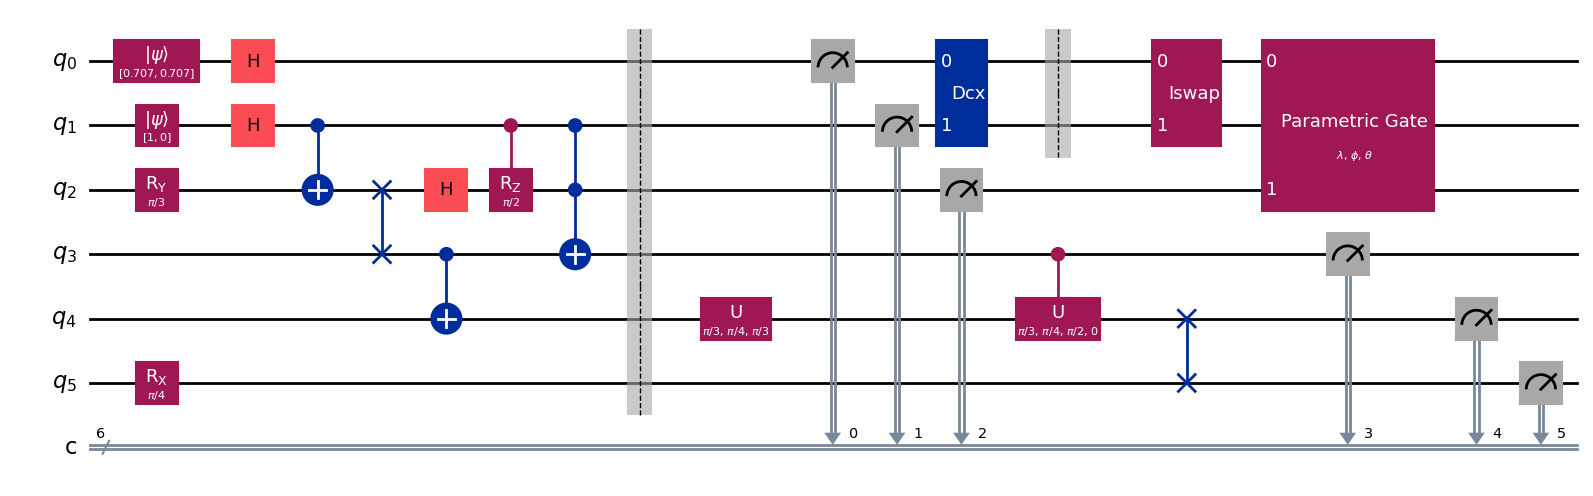

In [145]:
qc4 = QuantumCircuit(2)

qc4.rx(Parameter('$\\theta$'),0)
qc4.ry(Parameter('$\\lambda$'),1)
qc4.rz(Parameter('$\\phi$'),1)
qc4.cx(0,1)

qc.append(qc4.to_gate(label='Parametric Gate'),[0,2])

display(qc.draw("mpl", style="iqp"))

